# Modelo de Ising 2 Dimensões
### Rede Quadrada/Retângular com sitios centrais com 4, bordas com 3 e vertice com 2 vizinhos.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

Quantidade de Linhas e colunas da rede, Quantidade de sitios := N = LC

In [9]:
N = 30

### Gera uma rede de spins baseada no sorteio random.random

In [10]:
init_random = np.random.random((N,N))
rede = np.zeros((N, N))
rede[init_random>=0.5] = 1
rede[init_random<0.5] = -1

### Define a Energia do sistema, é calcula a interação dos vizinhos.
### $\frac{Energia}{J} = -\sum_{ij}s_is_j$.

Falta a energia do campo $h_is_i$

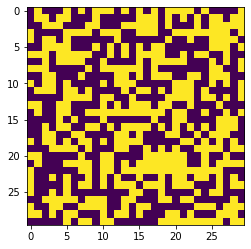

In [11]:
plt.imshow(rede)

In [12]:
def energia(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()

In [13]:
print(energia)

<function energia at 0x000001EACF034DC0>


In [14]:
@numba.njit("UniTuple(f8[:], 2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, Energia):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energia = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] 
        spin_f = spin_i*-1 
        
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energia += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energia += dE
            
        net_spins[t] = spin_arr.sum()
        net_energia[t] = energia
        
    return net_spins, net_energia

''''def snapshot(times):
    if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
        spin_arr[x,y]=spin_f
        energia += dE
    elif dE<=0:
        spin_arr[x,y]=spin_f
        energia += dE
   
        
    return snapshot'''

C:\Users\Pichau\anaconda3\lib\site-packages\numba\core\decorators.py:260: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


NotDefinedError: Failed in nopython mode pipeline (step: analyzing bytecode)
[1mThe compiler failed to analyze the bytecode. Variable 'energia' is not defined.
[1m
File "..\..\..\..\..\..\..\AppData\Local\Temp\ipykernel_10644\2939604941.py", line 32:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

In [15]:
spins, energies = metropolis(rede, 100000, 0.7, energia(rede))

NameError: name 'metropolis' is not defined

NameError: name 'spins' is not defined

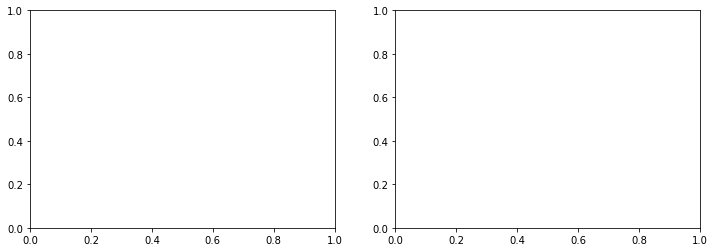

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.7', y=1.07, size=18)
plt.show()